Fuente: [Kaggle_Precio_oro](https://www.kaggle.com/datasets/farzadnekouei/gold-price-10-years-20132023)

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Paso 1: Importando librerias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Paso 2: Cargando dataset

In [54]:

df = pd.read_csv("/content/drive/MyDrive/Gold_Price_2013_2023.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [55]:
df.shape


(2583, 7)

In [56]:
# Renombrar la columna 'Change %' a 'Change Decimal' y convertirla de porcentaje a decimal
df['Var %'] = df['Change %'].str.replace('%', '').astype(float)
df.drop(columns=['Change %'], inplace=True)  # Eliminar la columna original

# Renombrar la columna 'Vol.' a 'Volume (Thousands)' y limpiar los datos
df['Volume (k)'] = df['Vol.'].str.replace('K', '').astype(float)
df.drop(columns=['Vol.'], inplace=True)  # Eliminar la columna original

# Quitar comas y convertir columnas a float
cols_to_convert = ['Price', 'Open', 'High', 'Low']
for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '').astype(float)

# Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [57]:
df

,Date,Price,Open,High,Low,Var %,Volume (k)
0,2022-12-30,1826.2,1821.8,1832.40,1819.80,0.01,107.50
1,2022-12-29,1826.0,1812.3,1827.30,1811.20,0.56,105.99
2,2022-12-28,1815.8,1822.4,1822.80,1804.20,-0.40,118.08
3,2022-12-27,1823.1,1808.2,1841.90,1808.00,0.74,159.62
4,2022-12-26,1809.7,1805.8,1811.95,1805.55,0.30,NaN
...,...,...,...,...,...,...,...
2578,2013-01-08,1663.2,1651.5,1662.60,1648.80,0.97,0.13
2579,2013-01-07,1647.2,1657.3,1663.80,1645.30,-0.16,0.09
2580,2013-01-04,1649.9,1664.4,1664.40,1630.00,-1.53,0.31
2581,2013-01-03,1675.6,1688.0,1689.30,1664.30,-0.85,0.19


In [59]:
# Vamos a eliminar datos a proposito, ya que esta casi limpio, para poder practicar el MCAR, MAR, MNAR:
# MCAR: Elimina valores al azar en la columna 'Price'
np.random.seed(0)  # Para reproducibilidad
mcar_indices = df.sample(frac=0.05).index  # Selecciona un 5% de filas al azar
df.loc[mcar_indices, 'Price'] = np.nan

# MAR: Elimina valores en la columna 'Open', condicionado por 'High'
mar_condition = df['High'] > df['High'].median()  # Condición: 'High' mayor que la mediana
mar_indices = df[mar_condition].sample(frac=0.05).index  # Selecciona un 5% bajo la condición
df.loc[mar_indices, 'Open'] = np.nan

# MNAR: Elimina valores en la columna 'Volume (k)' basado en los valores propios
mnar_condition = df['Volume (k)'] > 150  # Condición: 'Volume (k)' mayor que 150
mnar_indices = df[mnar_condition].sample(frac=0.05).index  # Selecciona un 5% bajo la condición
df.loc[mnar_indices, 'Volume (k)'] = np.nan



In [60]:
# Verifica los datos faltantes
df.isnull().sum()

,0
Date,0
Price,129
Open,64
High,0
Low,0
Var %,0
Volume (k),46


## Paso 3: EDA

#### Tipo de datos

In [63]:
df.dtypes

,0
Date,datetime64[ns]
Price,float64
Open,float64
High,float64
Low,float64
Var %,float64
Volume (k),float64


#### Conteo por tipo de datos

In [65]:
df.dtypes.value_counts()

,count
float64,6
datetime64[ns],1


#### Tamaño del dataset

In [66]:
df.shape

(2583, 7)

## Paso 4: Tratamiento datos faltantes

In [69]:
%run '/content/pandas_missing_extension_2.ipynb'

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24815 sha256=cc1857219a615c1b5a5284877ecd4e47238d2ef070d2211b9c6dbb8965fc8a21
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [73]:
df.size

18081

In [74]:
df.missing.number_complete()

17842

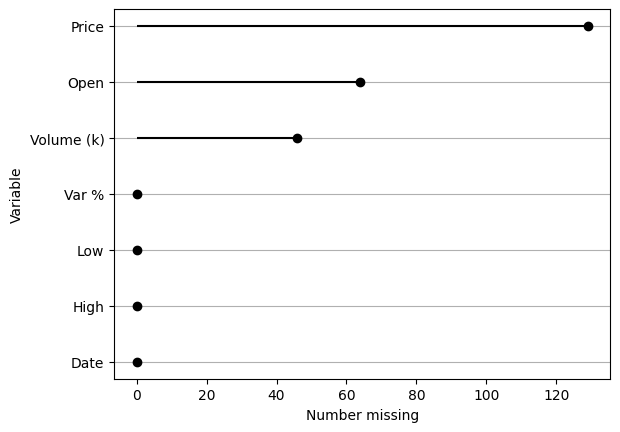

In [75]:
df.missing.missing_variable_plot()

### Clasificacion de tipo de faltante

In [76]:
import missingno

<Axes: >

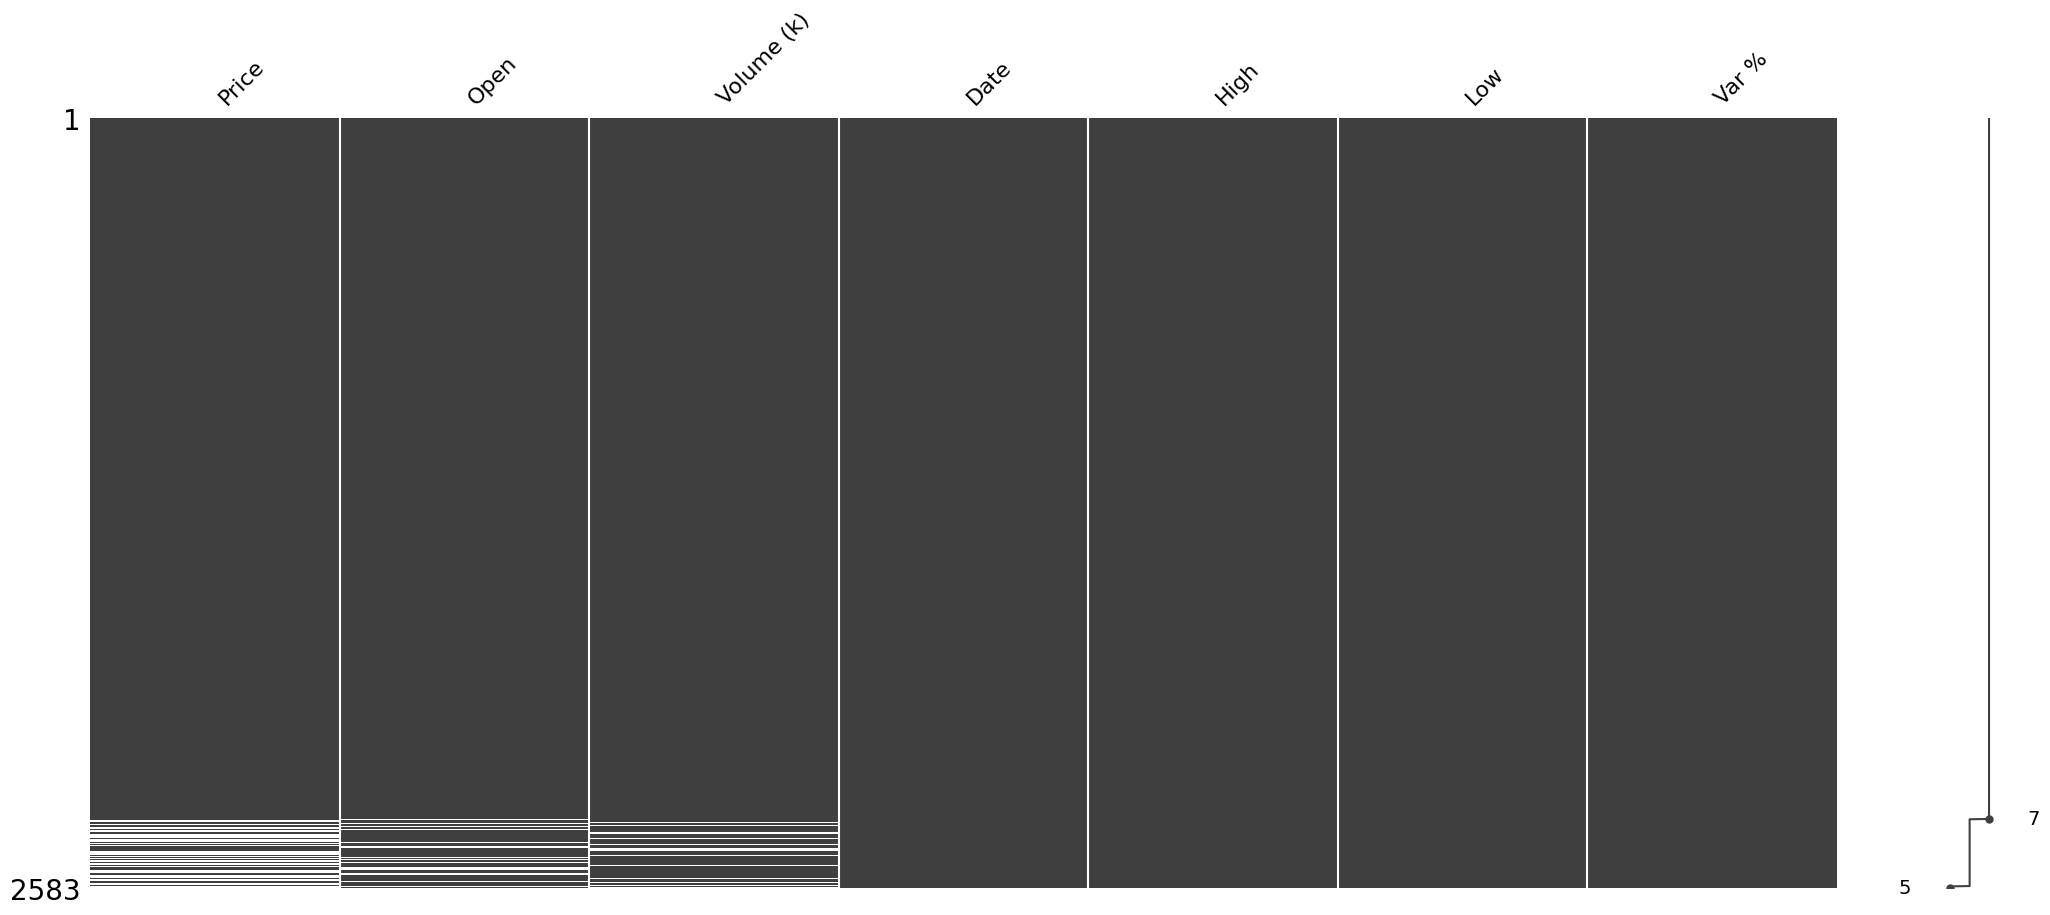

In [88]:
(
    df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix,sort="descending")
)

### Imputacion de data faltante

In [89]:
df.Price.describe()

,Price
count,2454.000000
mean,1442.021231
std,258.075027
min,1049.600000
25%,1244.800000
50%,1320.350000
75%,1717.600000
max,2058.400000


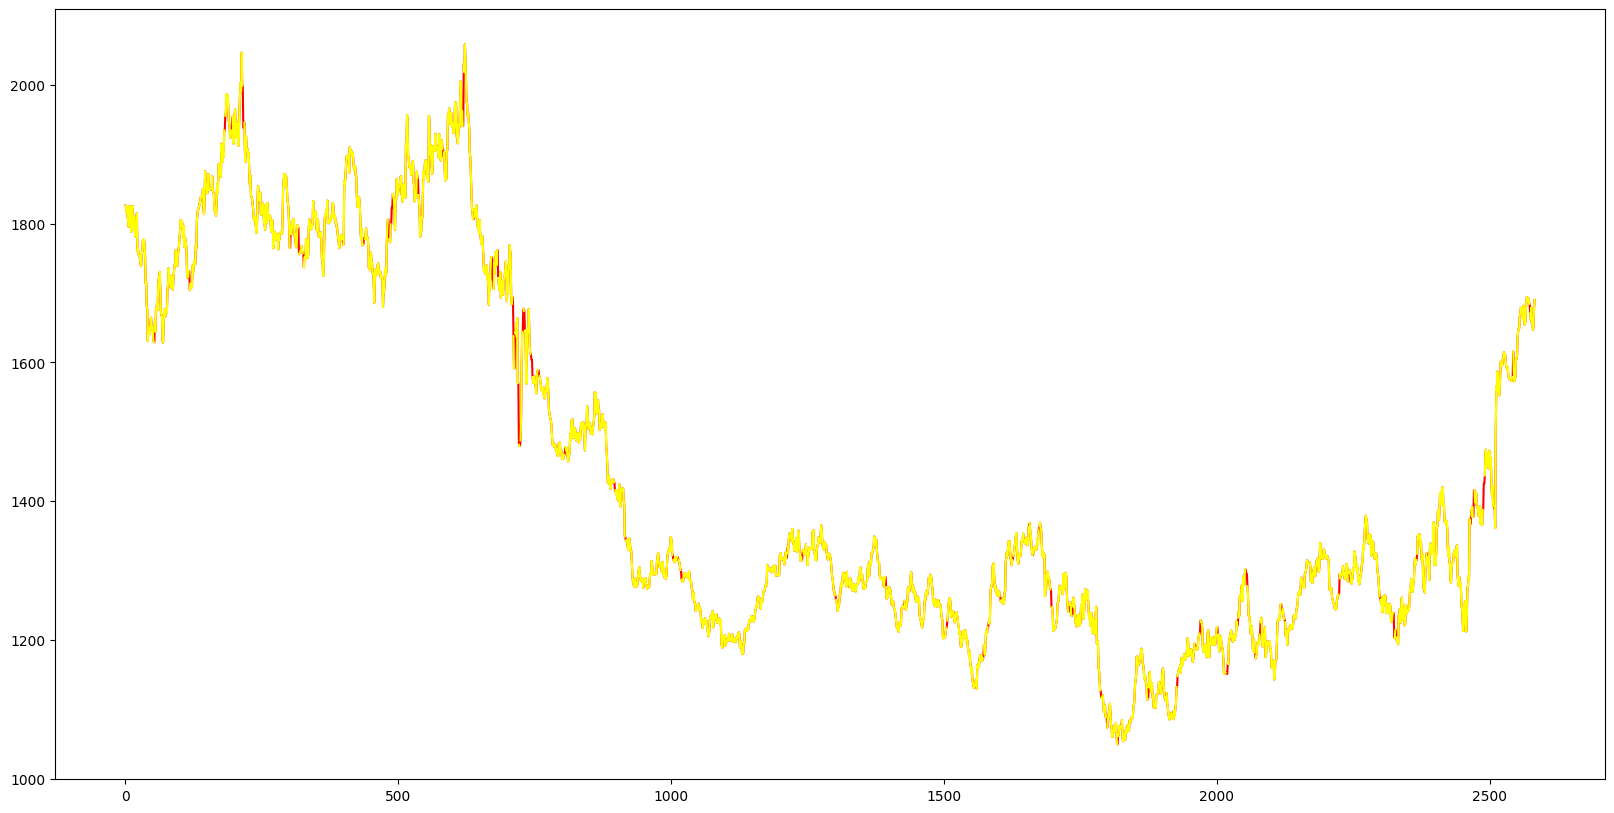

In [102]:
plt.figure(figsize=(20,10))
df['Price'].interpolate(method='nearest').plot(color='red') #con imputacion
df['Price'].plot(color='yellow') #sin imputacion
plt.show()

In [116]:
price_df = df
price_df['Price'].interpolate(method='nearest', inplace=True)
price_df['Price'].isna().sum()

0

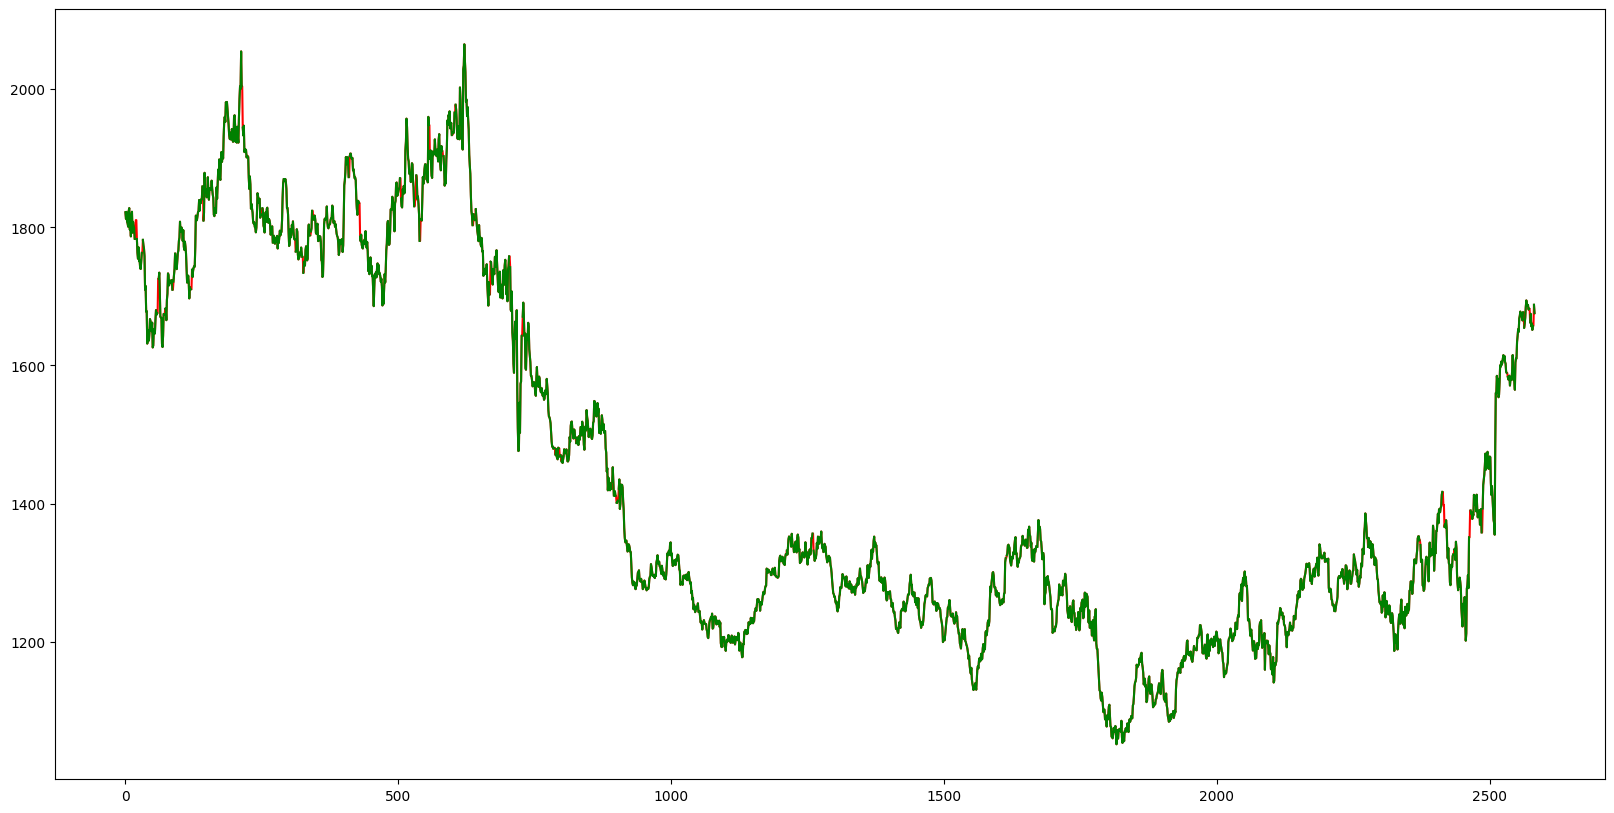

In [117]:
plt.figure(figsize=(20,10))
df['Open'].interpolate(method='nearest').plot(color='red')
df['Open'].plot(color='green')
plt.show()

In [119]:
df['Open'].interpolate(method='nearest',limit_direction='both',inplace=True)
df['Open'].isna().sum()

0

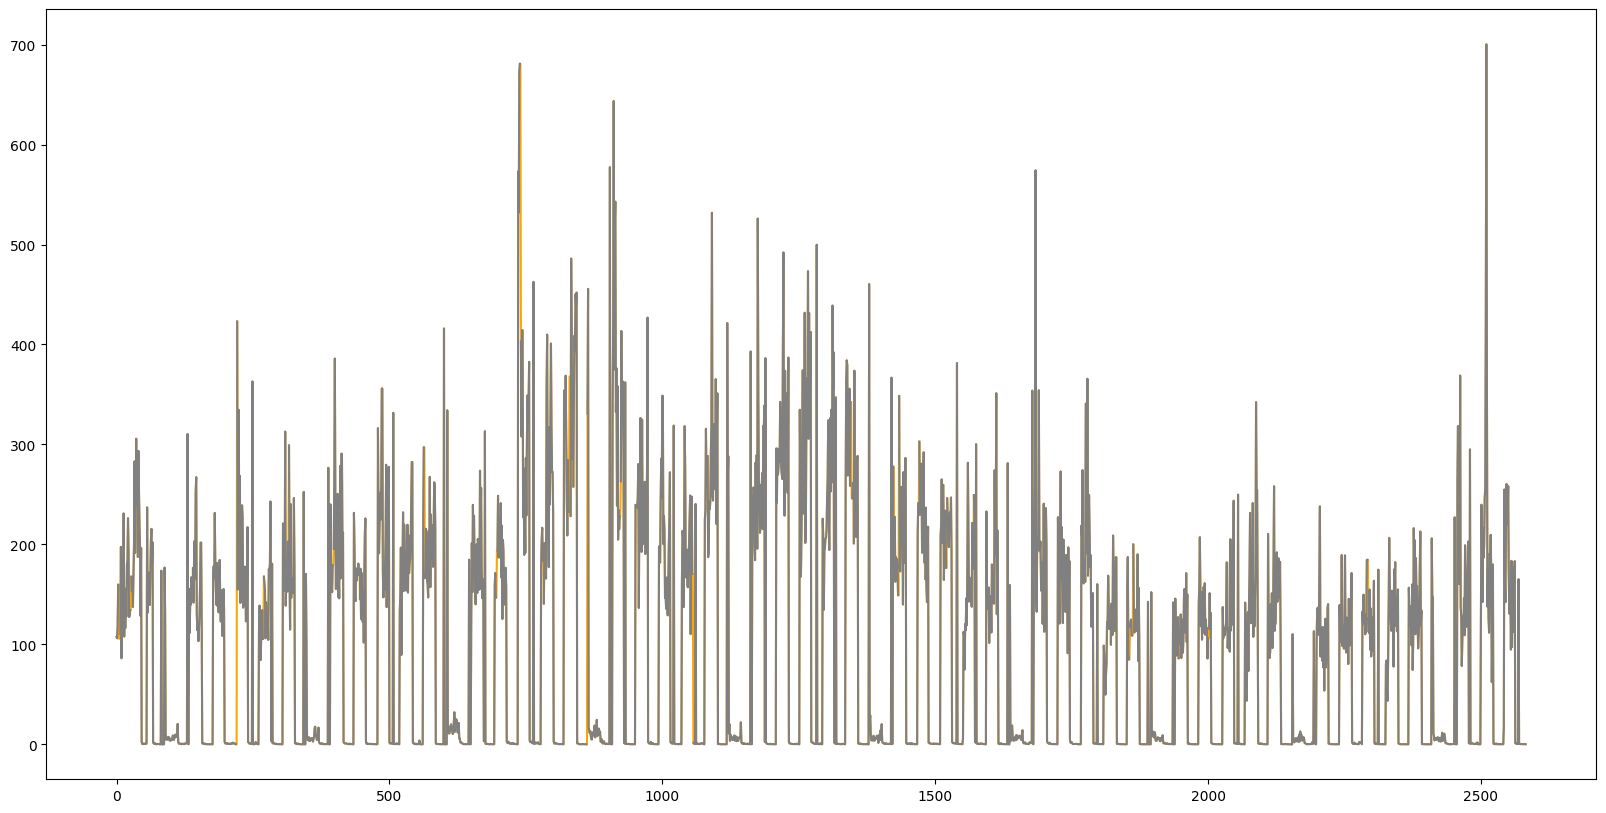

In [118]:
plt.figure(figsize=(20,10))
df['Volume (k)'].interpolate(method='nearest').plot(color='orange')
df['Volume (k)'].plot(color='gray')
plt.show()

In [121]:
df['Volume (k)'].interpolate(method='nearest',limit_direction='both',inplace=True)
df['Volume (k)'].isna().sum()

0

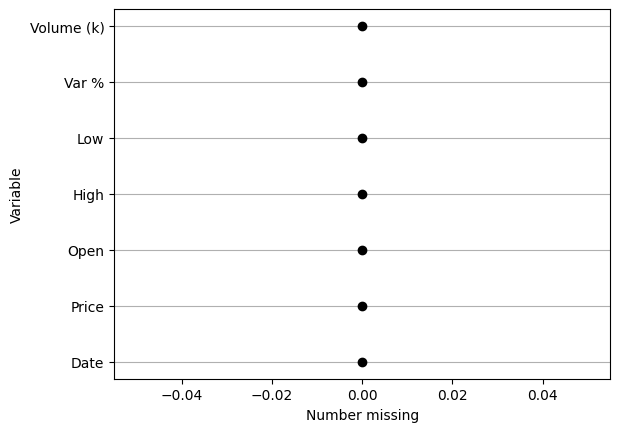

In [124]:
# verificando que no haya nan
df.missing.missing_variable_plot()

## Paso 5: Codificacion de variables categoricas

In [126]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.0/202.0 kB 4.1 MB/s eta 0:00:00


In [128]:
df = (
    df.clean_names(case_type='snake') #limpia, pone "_" en espacios en blanco
)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,price,open,high,low,var_%,volume_k_
0,2022-12-30,1826.2,1821.8,1832.40,1819.80,0.01,107.50
1,2022-12-29,1826.0,1812.3,1827.30,1811.20,0.56,105.99
2,2022-12-28,1815.8,1822.4,1822.80,1804.20,-0.40,118.08
3,2022-12-27,1823.1,1808.2,1841.90,1808.00,0.74,159.62
4,2022-12-26,1809.7,1805.8,1811.95,1805.55,0.30,159.62
...,...,...,...,...,...,...,...
2578,2013-01-08,1663.2,1651.5,1662.60,1648.80,0.97,0.13
2579,2013-01-07,1647.2,1657.3,1663.80,1645.30,-0.16,0.09
2580,2013-01-04,1649.9,1657.3,1664.40,1630.00,-1.53,0.31
2581,2013-01-03,1675.6,1688.0,1689.30,1664.30,-0.85,0.19


### Transformers

In [131]:
import sklearn.compose
import sklearn.preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
# No aplica, porq no tengo variables categoricas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Paso 6: Analisis estadistico

#### Correlaciones

In [133]:
df.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,price,open,high,low,var_%,volume_k_
date,1.000000,0.728339,0.726756,0.725552,0.730423,0.028334,0.100944
price,0.728339,1.000000,0.998549,0.999224,0.999316,0.032375,0.018940
open,0.726756,0.998549,1.000000,0.999324,0.999097,-0.013454,0.018064
high,0.725552,0.999224,0.999324,1.000000,0.998827,0.009196,0.022108
low,0.730423,0.999316,0.999097,0.998827,1.000000,0.013230,0.015007
var_%,0.028334,0.032375,-0.013454,0.009196,0.013230,1.000000,-0.002424
volume_k_,0.100944,0.018940,0.018064,0.022108,0.015007,-0.002424,1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

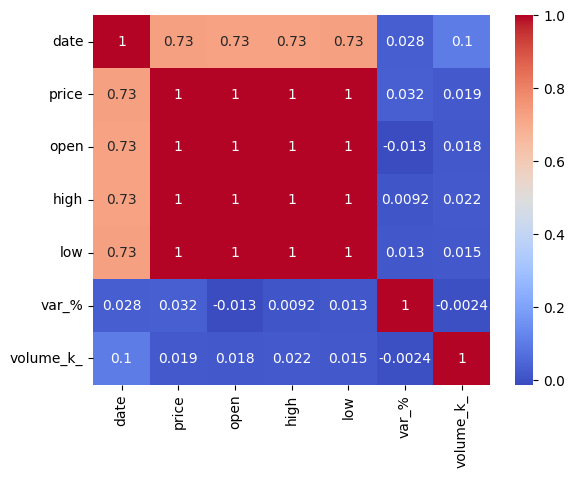

In [134]:
sns.heatmap(
    data=df.corr(),
    cmap='coolwarm',
    annot=True
)